### What is the most optimal skill to learn for Data Analysts?
##### Methodology
1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [2]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset


# loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills']  = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/home/adenian/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [4]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [5]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count', 'median':'median_salary'})
DA_job_count = len(df_DA_US)
df_DA_skills['skills_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100
skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skills_percent'] > skill_percent]
df_DA_skills_high_demand

,skill_count,median_salary,skills_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


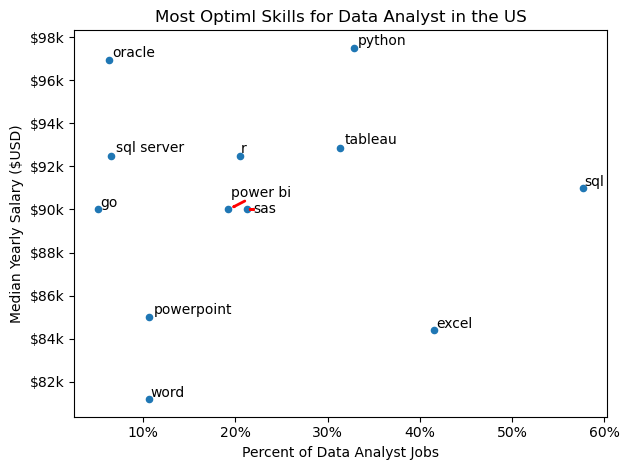

In [6]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind='scatter', x='skills_percent', y='median_salary')

texts = []

for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skills_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=2))

import matplotlib.ticker as mticker
from matplotlib.ticker import PercentFormatter
ax = plt.gca()

# Format x-axis with commas
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optiml Skills for Data Analyst in the US')
plt.tight_layout()
plt.show()

In [7]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [8]:
df_technology = df['job_type_skills'].copy()

#remove duplicates
df_technology = df_technology.drop_duplicates()

#remove NaN values
df_technology = df_technology.dropna()

#combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) #convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists in technology_dic, add value to existing
            technology_dict[key] += value  
        else:                       #if key does not exist in technology_dic, add key and value
            technology_dict[key] = value

#remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['outlook',
  'microstrategy',
  'spreadsheet',
  'cognos',
  'nuix',
  'sap',
  'ssrs',
  'datarobot',
  'excel',
  'powerpoint',
  'visio',
  'power bi',
  'sharepoint',
  'sas',
  'powerbi',
  'msaccess',
  'tableau',
  'word',
  'sheets',
  'spss',
  'ssis',
  'ms access',
  'looker',
  'alteryx',
  'qlik',
  'dax',
  'esquisse',
  'splunk'],
 'programming': ['mongo',
  'solidity',
  'haskell',
  'c',
  'crystal',
  'erlang',
  'css',
  'lua',
  'vba',
  'kotlin',
  'elixir',
  'java',
  'sql',
  'apl',
  'swift',
  'typescript',
  'no-sql',
  'cobol',
  'bash',
  'pascal',
  'html',
  'javascript',
  'clojure',
  'matlab',
  'python',
  'fortran',
  'ruby',
  'shell',
  'sas',
  'powershell',
  'groovy',
  'visual basic',
  'golang',
  'perl',
  'f#',
  'c#',
  't-sql',
  'vb.net',
  'dart',
  'lisp',
  'ocaml',
  'nosql',
  'r',
  'scala',
  'php',
  'go',
  'mongodb',
  'sass',
  'julia',
  'rust',
  'c++',
  'visualbasic',
  'objective-c',
  'delphi',
  'assem

In [9]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,outlook
0,analyst_tools,microstrategy
0,analyst_tools,spreadsheet
0,analyst_tools,cognos
0,analyst_tools,nuix
...,...,...
9,sync,symphony
9,sync,webex
9,sync,rocketchat
9,sync,microsoft teams


In [14]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

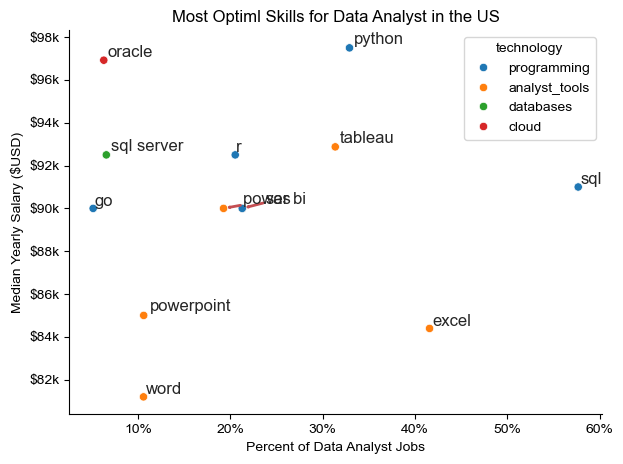

In [20]:
from adjustText import adjust_text

# df_plot.plot(kind='scatter', x='skills_percent', y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skills_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

texts = []

for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skills_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=2))

import matplotlib.ticker as mticker
from matplotlib.ticker import PercentFormatter
ax = plt.gca()

# Format x-axis with commas
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optiml Skills for Data Analyst in the US')
plt.tight_layout()
plt.show()